In [1]:
import pandas as pd
import numpy as np
from data.Functions import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('data/ml_gw_car_insurance.csv')

In [3]:
data = data_processing(dataset)
# data.drop(['Unnamed: 0','policy_id'], axis=1, inplace=True)
data

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,0.515874,-0.200500,1.354890,1,4990,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.672619,-0.923772,-0.748659,2,27003,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.841110,-0.923772,-0.646150,3,4076,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.900277,0.862825,-0.171140,4,21622,1,2,2,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.596403,0.862825,1.300866,5,34738,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,1.132040,1.354890,8,8794,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
58588,1.199642,-0.923772,0.548946,14,7788,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58589,1.162273,-0.200500,0.002782,5,34738,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58590,1.236307,1.254005,0.822720,8,8794,1,6,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:

X = data.drop(['is_claim'],axis=1)# Features
y = data.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=500, random_state=42)

# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)


,Feature,coefficients
0,policy_tenure,0.475826
2,age_of_policyholder,0.262873
1,age_of_car,0.154472
3,area_cluster,0.050144
4,population_density,0.049671
...,...,...
28,is_power_steering,0.000029
42,rear_brakes_Drum,0.000028
52,steering_type_Manual,0.000027
50,segment_Utility,0.000021


In [5]:
y_df = pd.DataFrame(y_test)
distribution = y_df.value_counts()
distribution

is_claim
0.0         10977
1.0           742
dtype: int64

Accuracy: 0.93
Recall: 0.01
Precision: 0.07
              precision    recall  f1-score   support

     refused       0.94      0.99      0.96     10977
    accepted       0.07      0.01      0.01       742

    accuracy                           0.93     11719
   macro avg       0.50      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



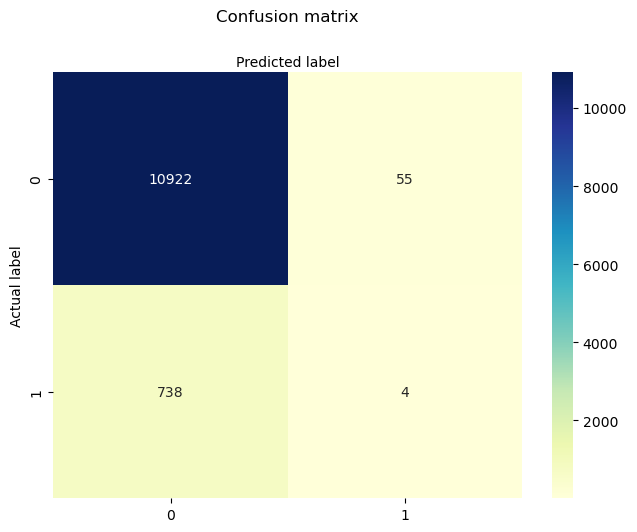

In [6]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

Optimal threshold: 0.03


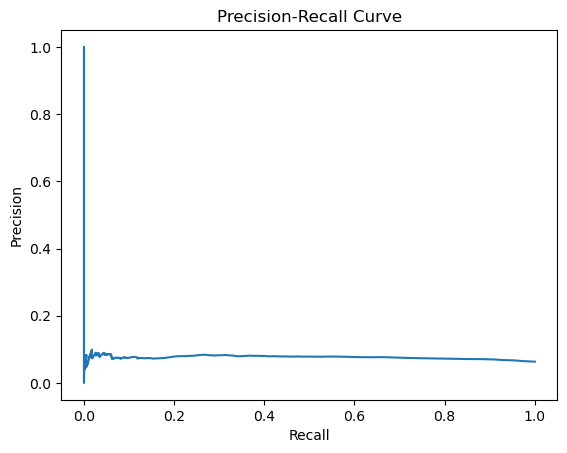

In [7]:
y_scores = logreg.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.55
Recall: 0.57
Precision: 0.08
              precision    recall  f1-score   support

     refused       0.95      0.54      0.69     10977
    accepted       0.08      0.57      0.14       742

    accuracy                           0.55     11719
   macro avg       0.51      0.56      0.41     11719
weighted avg       0.89      0.55      0.66     11719



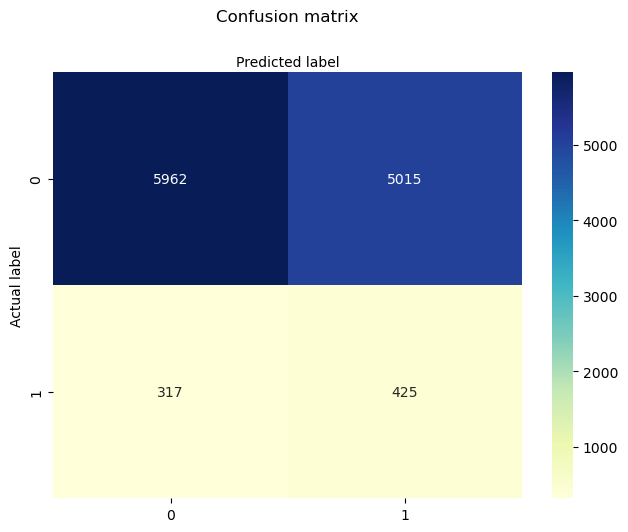

In [8]:
threshold = 0.04

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

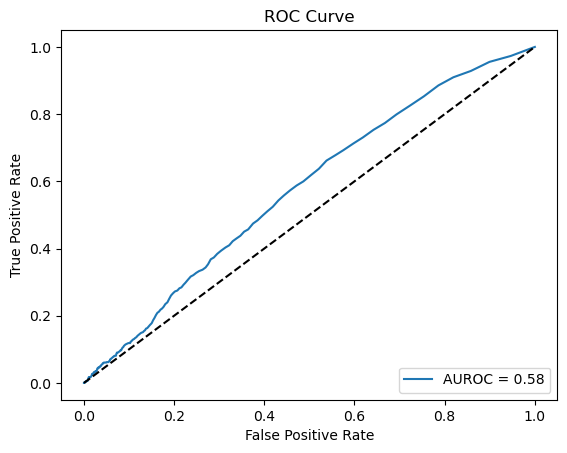

In [9]:
from sklearn.metrics import roc_curve, auc
y_scores = logreg.predict_proba(X_test)[:, 1]
# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Calculate the confusion matrix for each threshold
cms = [confusion_matrix(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Calculate sensitivity and specificity for each threshold
sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]

# Calculate balanced accuracy for each threshold
balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]

# Find the threshold that maximizes balanced accuracy
optimal_threshold = thresholds[np.argmax(balanced_accuracy)]

print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.03


Accuracy: 0.47
Recall: 0.66
Precision: 0.08
              precision    recall  f1-score   support

     refused       0.95      0.46      0.62     10977
    accepted       0.08      0.66      0.14       742

    accuracy                           0.47     11719
   macro avg       0.51      0.56      0.38     11719
weighted avg       0.90      0.47      0.59     11719



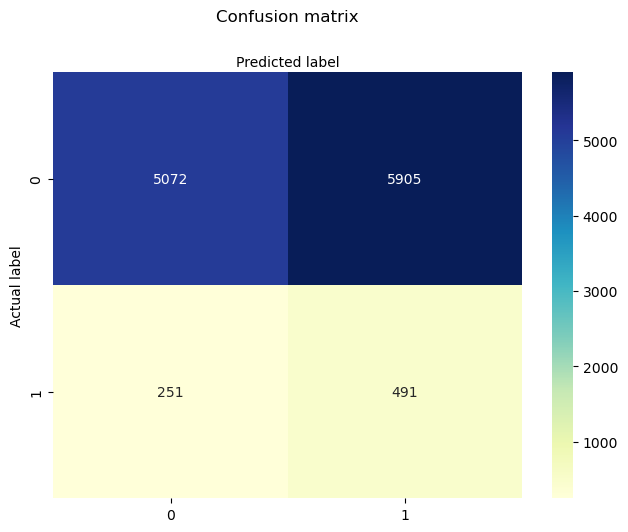

In [11]:
threshold = 0.03

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))